# Employee Attrition Prediction
## Notebook 01: Data Ingestion & Exploratory Data Analysis (EDA)

This notebook covers:
- AWS SageMaker environment setup
- Loading raw train and test datasets
- Uploading raw data to Amazon S3
- Basic exploratory data analysis

No data cleaning or feature engineering is performed in this notebook.

In [1]:
import pandas as pd
import numpy as np

import boto3
import sagemaker
from sagemaker.session import Session

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [2]:
# Initialize SageMaker session
sagemaker_session = sagemaker.Session()

# Get execution role
role = sagemaker.get_execution_role()

# Default S3 bucket
bucket = sagemaker_session.default_bucket()

print("IAM Role:")
print(role)

print("\nDefault S3 Bucket:")
print(bucket)

IAM Role:
arn:aws:iam::952878272094:role/LabRole

Default S3 Bucket:
sagemaker-us-east-1-952878272094


In [4]:
train_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../test.csv")

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

train_df.head()

Train dataset shape: (59598, 24)
Test dataset shape: (14900, 24)


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [6]:
train_df.isnull().sum().sort_values(ascending=False)

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [7]:
train_df["Attrition"].value_counts()

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

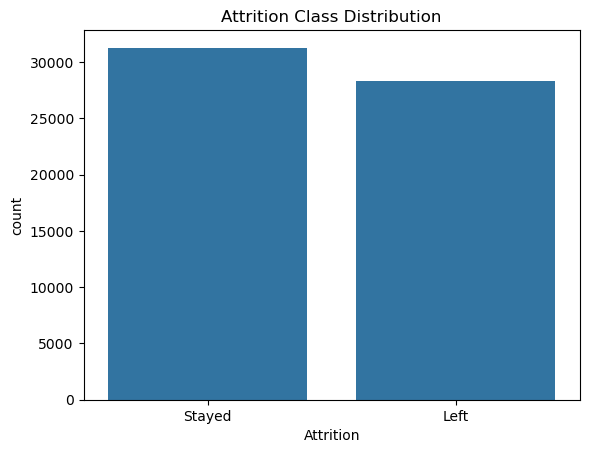

In [8]:
sns.countplot(x="Attrition", data=train_df)
plt.title("Attrition Class Distribution")
plt.show()

In [9]:
train_df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


## Uploading Raw Data to Amazon S3

In [10]:
s3_prefix = "employee-attrition/raw-data"

train_s3_path = sagemaker_session.upload_data(
    path="../train.csv",
    bucket=bucket,
    key_prefix=s3_prefix
)

test_s3_path = sagemaker_session.upload_data(
    path="../test.csv",
    bucket=bucket,
    key_prefix=s3_prefix
)

print("Train data uploaded to:", train_s3_path)
print("Test data uploaded to:", test_s3_path)

Train data uploaded to: s3://sagemaker-us-east-1-952878272094/employee-attrition/raw-data/train.csv
Test data uploaded to: s3://sagemaker-us-east-1-952878272094/employee-attrition/raw-data/test.csv


In [11]:
train_df_s3 = pd.read_csv(train_s3_path)
test_df_s3 = pd.read_csv(test_s3_path)

print(train_df_s3.shape, test_df_s3.shape)

(59598, 24) (14900, 24)


### Key Observations

- The dataset contains both numerical and categorical features.
- The target variable (Attrition) is binary and shows class imbalance.
- Several categorical features will require encoding.
- No preprocessing decisions are applied in this notebook.
- Raw datasets are successfully stored in Amazon S3.
